# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [11]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[    0.           666.10809934   281.11385594 ...,   217.08293346
    789.38267019  1220.46097848]
 [  666.10809934     0.           649.32657423 ...,   596.25917184
   1421.55724471  1716.04924172]
 [  281.11385594   649.32657423     0.         ...,   463.24939288
    995.3140208   1483.59361012]
 ..., 
 [  217.08293346   596.25917184   463.24939288 ...,     0.           829.60834133
   1150.76061803]
 [  789.38267019  1421.55724471   995.3140208  ...,   829.60834133     0.
    624.81997407]
 [ 1220.46097848  1716.04924172  1483.59361012 ...,  1150.76061803
    624.81997407     0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


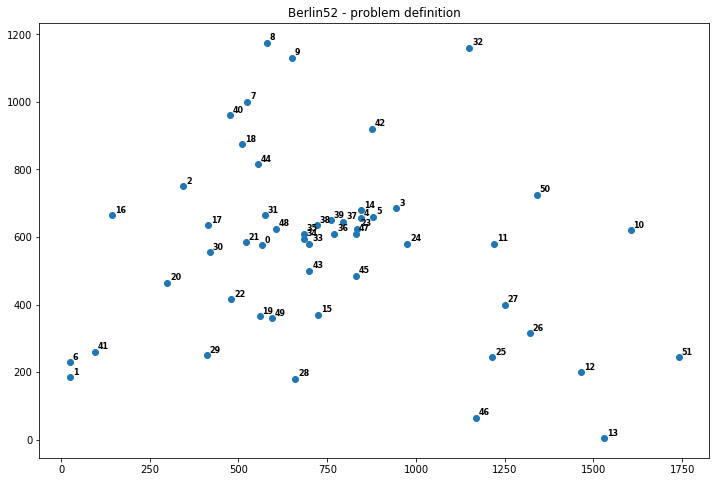

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

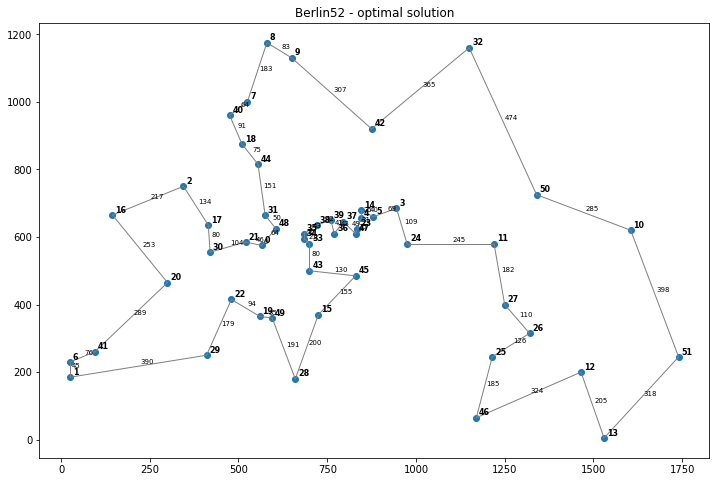

In [4]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [27]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)

7544.3659019 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [7]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

42.270999908447266
21785.7986805 [29  6 21 35  7 18  2  0 30 41 22 19 20  1 17  8 33 44 24 40 47 31 36 23 43
 15 32 45 34 38 14 39  5  9 49 48 11 50  4 42 12 28 51 10  3 16 37 27 25 13
 46 26]


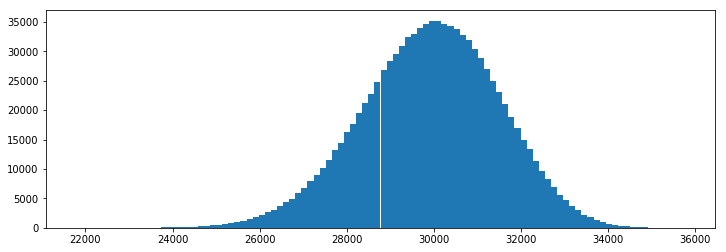

29916.5052699 1578.60276838


In [8]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [13]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [18]:
samples = 10
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

results = np.zeros(samples)

for i in range(samples):
    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    results[i] = costs.min()
    print(i, results[i])

print(time.time() - t0, results.min())

0 9155.95402739
1 8485.47246322
2 8827.10819159
3 9306.20447527
4 8591.3366779
5 8138.09220091
6 9301.76631782
7 8371.7922195
8 8881.07297644
9 8598.71853148
440.8599662780762 8138.09220091


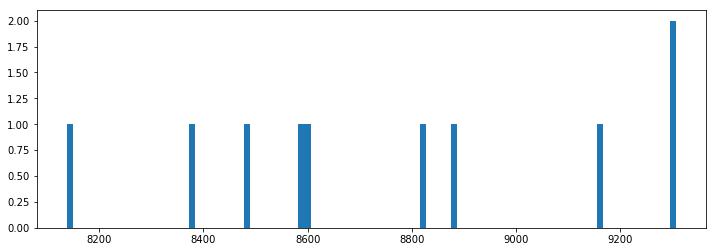

In [19]:
plt.figure(figsize=(12,4))
plt.hist(results, bins=100)
plt.show()

## SGA-PMX

In [25]:
import random

def PMX(ind1, ind2):
    
    size = ind1.size
    p1, p2 = np.zeros(size, dtype=int), np.zeros(size, dtype=int)

    for i in range(size):
        p1[ind1[i]] = i
        p2[ind2[i]] = i

    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else: 
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
    
    for i in range(cxpoint1, cxpoint2):
        temp1 = ind1[i]
        temp2 = ind2[i]

        ind1[i], ind1[p1[temp2]] = temp2, temp1
        ind2[i], ind2[p2[temp1]] = temp1, temp2

        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]

    return ind1, ind2

In [26]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [27]:
samples = 10

population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

results = np.zeros(samples)

for s in range(samples):
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
    
    results[s] = best_objective_value
    print(s, best_objective_value)
        # print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, 
        #    objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

0 8117.65283966
1 8130.48229083
2 8302.82831855
3 8094.95657707
4 8454.81172535
5 8380.36532905
6 8358.10999573
7 8220.07751306
8 7672.72265134
9 8481.94033097


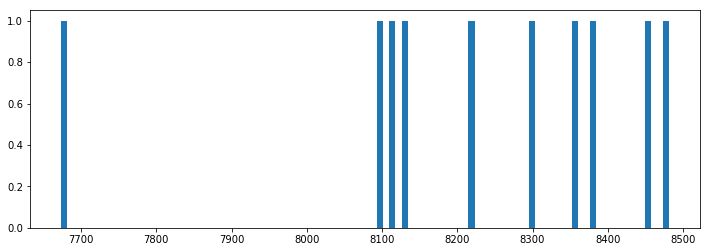

In [28]:
plt.figure(figsize=(12,4))
plt.hist(results, bins=100)
plt.show()

In [31]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

res_min, res_mean, res_max = np.zeros(number_of_iterations), np.zeros(number_of_iterations), np.zeros(number_of_iterations)   

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics
    if best_objective_value > objective_values[0]:
        best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]
    
    res_min[t] = objective_values.min()
    res_mean[t] = objective_values.mean()
    res_max[t] = objective_values.max()
    # print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, 
    #    objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

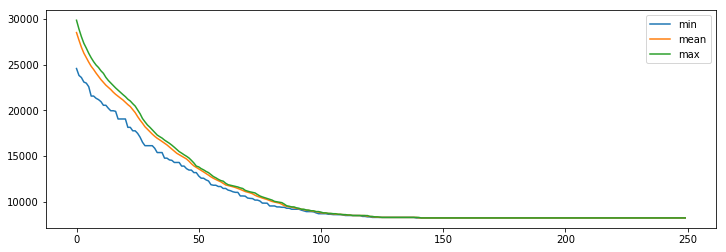

In [38]:
plt.figure(figsize=(12,4))
plt.plot(res_min, label="min")
plt.plot(res_mean, label="mean")
plt.plot(res_max, label="max")
plt.legend()
plt.show()

In [42]:
samples = 10

population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

results = np.zeros(samples)

def transpose_mutation(ind):
    e1 = random.randint(0, ind.size - 1)
    e2 = random.randint(0, ind.size - 1)
    ind[e1], ind[e2] = ind[e2], ind[e1]
    return ind

for s in range(samples):
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = transpose_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
    
    results[s] = best_objective_value
    print(s, best_objective_value)
        # print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, 
        #    objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

0 9650.21209693
1 10570.5354735
2 10517.617604
3 10423.9285015
4 10255.1429603
5 9998.45490744
6 9633.74687466
7 10001.7287291
8 9087.68124747
9 11328.4876991


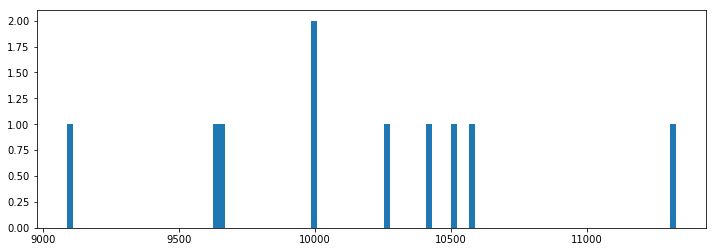

In [43]:
plt.figure(figsize=(12,4))
plt.hist(results, bins=100)
plt.show()

In [28]:
def SGA(A, n, cross_op = PMX, mut_op=reverse_sequence_mutation):
    samples = 10

    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    results = np.zeros(samples)

    for s in range(samples):
        time0 = time.time()

        best_objective_value = np.Inf
        best_chromosome = np.zeros((1, chromosome_length))

        # generating an initial population
        current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
        for i in range(population_size):
            current_population[i, :] = np.random.permutation(chromosome_length)

        # evaluating the objective function on the current population
        objective_values = np.zeros(population_size)
        for i in range(population_size):
            objective_values[i] = tsp_objective_function(current_population[i, :])

        for t in range(number_of_iterations):

            # selecting the parent indices by the roulette wheel method
            fitness_values = objective_values.max() - objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(population_size) / population_size
            parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
            for i in range(int(number_of_offspring/2)):
                if np.random.random() < crossover_probability:
                    children_population[2*i, :], children_population[2*i+1, :] = cross_op(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
            if np.mod(number_of_offspring, 2) == 1:
                children_population[-1, :] = current_population[parent_indices[-1], :]

            # mutating the children population
            for i in range(number_of_offspring):
                if np.random.random() < mutation_probability:
                    children_population[i, :] = mut_op(children_population[i, :])

            # evaluating the objective function on the children population
            children_objective_values = np.zeros(number_of_offspring)
            for i in range(number_of_offspring):
                children_objective_values[i] = tsp_objective_function(children_population[i, :])

            # replacing the current population by (Mu + Lambda) Replacement
            objective_values = np.hstack([objective_values, children_objective_values])
            current_population = np.vstack([current_population, children_population])

            I = np.argsort(objective_values)
            current_population = current_population[I[:population_size], :]
            objective_values = objective_values[I[:population_size]]

            # recording some statistics
            if best_objective_value > objective_values[0]:
                best_objective_value = objective_values[0]
                best_chromosome = current_population[0, :]

        results[s] = best_objective_value
        print(s, best_objective_value)
    
    plt.figure(figsize=(12,4))
    plt.hist(results, bins=100)
    plt.show()


In [56]:
def parse_tsp(filename):
    data = ""
    with open(filename) as fh:
        data = fh.read().split("\n")
    n = int(data[3].split()[1])
    e_type = data[4].split()[1]
    e_format = ""
    if e_type == "EXPLICIT":
        e_format = data[5].split()[1]

    print(e_type)
    print(e_format)
    
    A = np.empty((n, n), dtype=int)
    if e_type == "EXPLICIT" and e_format == "UPPER_ROW":
        for i in range(n-1):
            edges = map(int, data[i+8].split())
            for j, v in enumerate(edges):
                A[i, i + j + 1] = v
                A[i + j + 1, i] = v
        for i in range(n):
            A[i, i] = 0

    if e_type == "EXPLICIT" and e_format == "FULL_MATRIX":
        for i in range(n):
            edges = map(int, data[i+8].split())
            for j, v in enumerate(edges):
                A[i, j] = v
    if e_type == "EUC_2D":
        coords = np.empty((n,2))
        for i in range(n):
            coord = list(map(int, data[i+6].split()))
            coords[coord[0]-1, :] = np.array([coord[1:]])
        for i in range(n):
            for j in range(n):
                A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    return A, n

EXPLICIT
UPPER_ROW
0 1615.0
1 1728.0
2 1610.0
3 1635.0
4 1811.0
5 1648.0
6 1646.0
7 1622.0
8 1646.0
9 1628.0


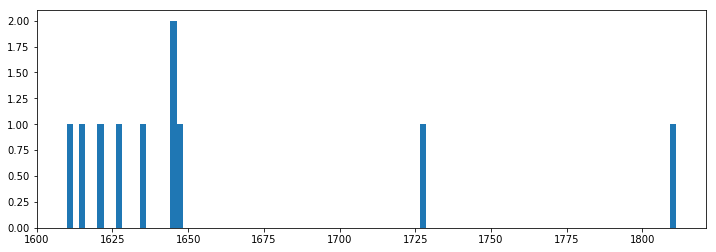

In [61]:
A, n = parse_tsp("bayg29.tsp") # 1610
SGA(A, n)

EXPLICIT
FULL_MATRIX
0 2072.0
1 2034.0
2 2066.0
3 2105.0
4 2081.0
5 2135.0
6 2111.0
7 2073.0
8 2052.0
9 2068.0


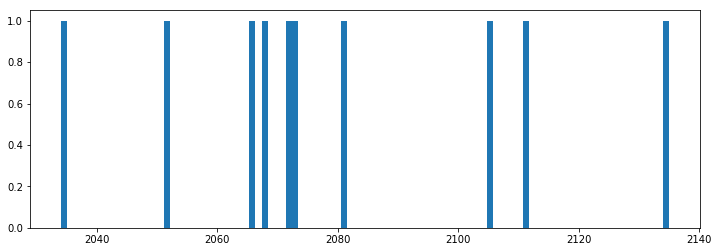

In [62]:
A, n = parse_tsp("bays29.tsp") # 2020
SGA(A, n)

EUC_2D

0 29455.0
1 27512.0
2 26969.0
3 30549.0
4 26376.0
5 28613.0
6 25962.0
7 30306.0
8 29649.0
9 31251.0


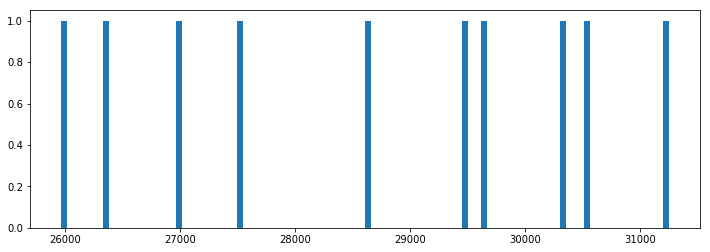

In [57]:
A, n = parse_tsp("kroA100.tsp") # 21282
SGA(A, n)

EUC_2D

0 56976.0
1 51235.0
2 58530.0
3 57201.0
4 57900.0
5 58309.0
6 59472.0
7 58316.0
8 63254.0
9 56088.0


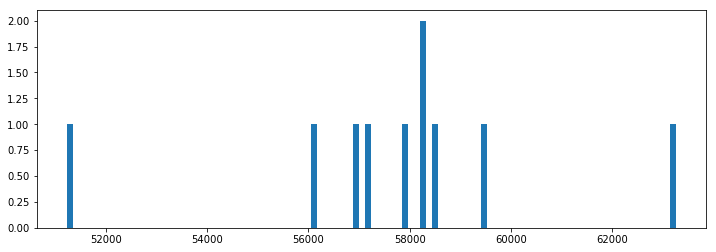

In [59]:
A, n = parse_tsp("kroA150.tsp") # 26524
SGA(A, n)

EUC_2D

0 97300.0
1 90038.0
2 85002.0
3 90285.0
4 96499.0
5 98006.0
6 100394.0
7 90388.0
8 93046.0
9 88292.0


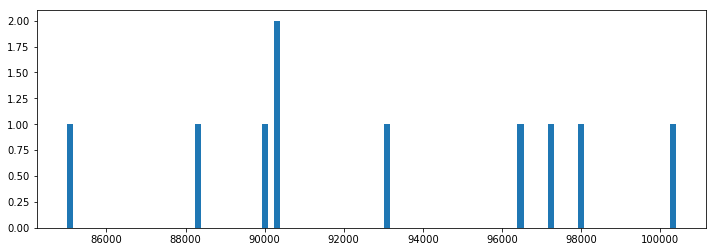

In [60]:
A, n = parse_tsp("kroA200.tsp") # 29368
SGA(A, n)

EUC_2D

0 11442.0
1 12383.0
2 11802.0
3 11293.0
4 11551.0
5 11986.0
6 12627.0
7 11232.0
8 11600.0
9 11752.0


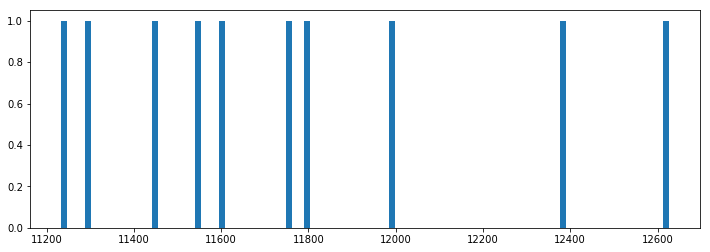

In [63]:
A, n = parse_tsp("a280.tsp") # 2579
SGA(A, n)

In [64]:
def OX(ind1, ind2):
    size = ind1.size
    a, b = random.sample(range(size), 2)
    if a > b:
        a, b = b, a

    holes1, holes2 = np.ones(size, dtype=int), np.ones(size, dtype=int)
    for i in range(size):
        if i < a or i > b:
            holes1[ind2[i]] = 0
            holes2[ind1[i]] = 0
    
    temp1, temp2 = ind1, ind2
    k1 , k2 = b + 1, b + 1
    for i in range(size):
        if not holes1[temp1[(i + b + 1) % size]]:
            ind1[k1 % size] = temp1[(i + b + 1) % size]
            k1 += 1
        
        if not holes2[temp2[(i + b + 1) % size]]:
            ind2[k2 % size] = temp2[(i + b + 1) % size]
            k2 += 1
    
    for i in range(a, b + 1):
        ind1[i], ind2[i] = ind2[i], ind1[i]
    
    return ind1, ind2

EUC_2D

0 10573.0
1 10645.0
2 10020.0
3 10900.0
4 10698.0
5 9946.0
6 11144.0
7 10586.0
8 10536.0
9 10363.0


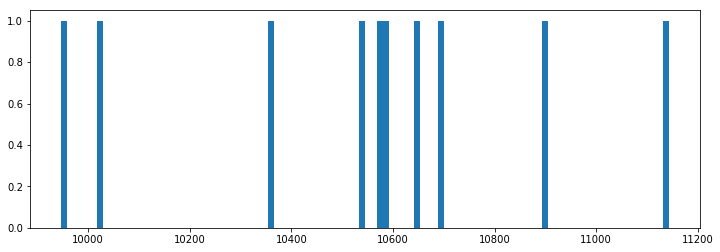

In [66]:
A, n = parse_tsp("a280.tsp") # 2579
SGA(A, n, cross_op=OX)

In [156]:
import copy

def CX(ind1, ind2):
    size = ind1.size
    pos_v = [0] * size
    pos_i = [set() for i in range(size + 1)]

    for i in range(size):
        pos_v[i] = set([ind1[i], ind2[i]])
        pos_i[ind1[i]].add(i)
        pos_i[ind2[i]].add(i)
    
    def CX_(ind1, ind2):
        pos_v_ = copy.deepcopy(pos_v)
        pos_i_ = copy.deepcopy(pos_i)
        child = np.zeros(size)
        
        def erase(i, v):
            if len(pos_i_[v]) == 0:
                return
            pos_i_[v].remove(i)
            if len(pos_i_[v]) == 0:
                pos_v_[i].remove(v)
                return
            i_ = pos_i_[v].pop()
            pos_v_[i_].remove(v)
            if len(pos_v_[i_]) == 1:
                v_ = pos_v_[i_].pop()
                child[i_] = v_
                erase(i_, v_)
        
        for i in range(size):
            if child[i] > 0:
                continue
            v = random.sample(pos_v_[i], 1)[0]
            child[i] = v
            erase(i, v)
        
        return child
        
    return CX_(ind1, ind2), CX_(ind1, ind2)

a = np.array([1,2,5,4,3,6,7,8], dtype=int)
b = np.array([2,8,6,4,7,1,3,5], dtype=int)
CX(a, b)

(array([ 1.,  2.,  5.,  4.,  3.,  6.,  7.,  8.]),
 array([ 1.,  2.,  5.,  4.,  7.,  6.,  3.,  8.]))

EUC_2D

0 10347.0
1 10537.0
2 10150.0
3 10508.0
4 10960.0
5 10357.0
6 10360.0
7 10975.0
8 11451.0
9 10597.0


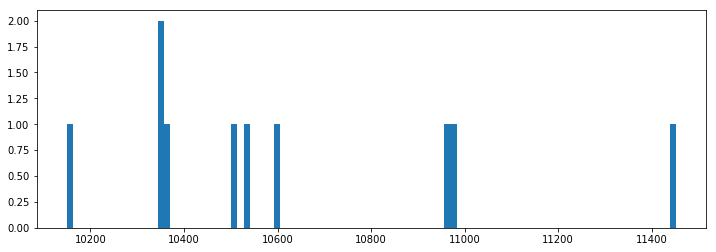

In [157]:
A, n = parse_tsp("a280.tsp") # 2579
SGA(A, n, cross_op=OX)

In [249]:
from itertools import combinations, permutations



def neighbours(ind, K):
    indices = range(ind.size)
    for k in range(2, K + 1):
        for comb in combinations(indices, k):
            comb = np.array(comb)
            chunk = ind[comb]
            ind_ = ind.copy()
            
            perms = permutations(chunk)
            next(perms)
            for perm in perms:
                ind_[comb] = perm
                yield ind_

def get_local_min(ind, K):
    best_neigh = ind
    best_neigh_cost = tsp_objective_function(ind)
    for neigh in neighbours(ind, K):
        neigh_cost = tsp_objective_function(neigh)
        if neigh_cost < best_neigh_cost:
            best_neigh = neigh
            best_neigh_cost = neigh_cost
    return best_neigh
    
def iterative_min(ind, K):
    ind_ = get_local_min(ind, K)
    while not np.array_equal(ind, ind_):
        ind = ind_
        ind_ = get_local_min(ind, K)
    return ind_


In [252]:
def SGA_it(A, n, cross_op = PMX, mut_op=reverse_sequence_mutation, K=3, samples=10):
    population_size = 50
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    iteration_prob = 0.01
    number_of_iterations = 250

    results = np.zeros(samples)

    for s in range(samples):
        time0 = time.time()

        best_objective_value = np.Inf
        best_chromosome = np.zeros((1, chromosome_length))

        # generating an initial population
        current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
        for i in range(population_size):
            t = iterative_min(np.random.permutation(chromosome_length), K)
            current_population[i, :] = t
            
        print("Found local minimas")
        # evaluating the objective function on the current population
        objective_values = np.zeros(population_size)
        for i in range(population_size):
            objective_values[i] = tsp_objective_function(current_population[i, :])

        for t in range(number_of_iterations):

            # selecting the parent indices by the roulette wheel method
            fitness_values = objective_values.max() - objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(population_size) / population_size
            parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
            for i in range(int(number_of_offspring/2)):
                if np.random.random() < crossover_probability:
                    children_population[2*i, :], children_population[2*i+1, :] = cross_op(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
            if np.mod(number_of_offspring, 2) == 1:
                children_population[-1, :] = current_population[parent_indices[-1], :]

            # mutating the children population
            for i in range(number_of_offspring):
                if np.random.random() < mutation_probability:
                    children_population[i, :] = mut_op(children_population[i, :])

            # evaluating the objective function on the children population
            children_objective_values = np.zeros(number_of_offspring)
            for i in range(number_of_offspring):
                children_objective_values[i] = tsp_objective_function(children_population[i, :])

            # replacing the current population by (Mu + Lambda) Replacement
            objective_values = np.hstack([objective_values, children_objective_values])
            current_population = np.vstack([current_population, children_population])

            I = np.argsort(objective_values)
            current_population = current_population[I[:population_size], :]
            objective_values = objective_values[I[:population_size]]

            # recording some statistics
            if best_objective_value > objective_values[0]:
                best_objective_value = objective_values[0]
                best_chromosome = current_population[0, :]

        results[s] = best_objective_value
        print(s, best_objective_value)
    
    plt.figure(figsize=(12,4))
    plt.hist(results, bins=100)
    plt.show()


EXPLICIT
FULL_MATRIX
Found local minimas
0 2034.0


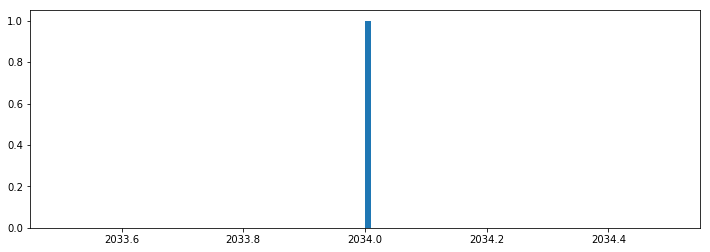

In [255]:
A, n = parse_tsp("bays29.tsp") # 2579
SGA_it(A, n, cross_op=PMX, samples=1)

FileNotFoundError: [Errno 2] No such file or directory: 'bays28.tsp'